# Performance Functions Demo

This notebook demos all performance functions using `mom_zerobeta_weights.parquet`.

The demo is organized into three sections:
1. **Returns** - Portfolio returns calculation, summary tables, and charts
2. **Leverage** - Portfolio leverage calculation, summary tables, and charts
3. **Drawdowns** - Portfolio drawdown calculation, summary tables, and charts

## Setup

In [1]:
import polars as pl
import sf_quant.performance as sfp

/Users/seantitensor/Documents/sf-quant/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-11 16:25:12,853	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
# Load the weights data

weights = pl.read_parquet("/Users/seantitensor/Documents/sf-quant/mom_zerobeta_weights.parquet")
print(f"Loaded weights shape: {weights.shape}")
print(f"Columns: {weights.columns}")
print(f"Date range: {weights['date'].min()} to {weights['date'].max()}")

Loaded weights shape: (14586306, 3)
Columns: ['date', 'barrid', 'weight']
Date range: 2000-12-29 to 2024-01-31


---
## 1. Returns

Test portfolio returns generation, summary statistics, and visualization.

### 1.1 Generate Single Portfolio Returns

In [4]:
returns = sfp.generate_returns_from_weights(weights)
returns.head()

date,return
date,f64
2000-12-29,-0.001106
2001-01-02,0.011518
2001-01-03,0.009015
2001-01-04,-0.002672
2001-01-05,-0.006342


### 1.2 Generate Multi-Portfolio Returns

In [5]:
multi_returns = sfp.generate_multi_returns_from_weights(weights)
multi_returns.head(10)

date,portfolio,return
date,str,f64
2000-12-29,"""active""",0.009464
2000-12-29,"""benchmark""",-0.01057
2000-12-29,"""total""",-0.001106
2001-01-02,"""active""",0.040077
2001-01-02,"""benchmark""",-0.028559
2001-01-02,"""total""",0.011518
2001-01-03,"""active""",-0.049819
2001-01-03,"""benchmark""",0.058834
2001-01-03,"""total""",0.009015


### 1.3 Returns Summary Table (Single Portfolio)

In [6]:
returns_summary = sfp.generate_returns_summary_table(returns)
returns_summary

Count,Mean Return (%),Volatility (%),Total Return (%),Sharpe
u32,f64,f64,f64,f64
5807,31.69,24.93,72034.27,1.27


### 1.4 Multi-Returns Summary Table (Wide Format)

In [7]:
multi_returns_summary_wide = sfp.generate_multi_returns_summary_table(multi_returns, wide=True)
multi_returns_summary_wide

Portfolio,Count,Mean Return (%),Volatility (%),Total Return (%),Sharpe
str,u32,f64,f64,f64,f64
"""Active""",5807,14.63,34.94,612.71,0.42
"""Benchmark""",5807,17.05,19.19,3221.89,0.89
"""Total""",5807,31.69,24.93,72034.27,1.27


### 1.5 Multi-Returns Summary Table (Long Format)

In [8]:
multi_returns_summary_long = sfp.generate_multi_returns_summary_table(multi_returns, wide=False)
multi_returns_summary_long

statistics,Active,Benchmark,Total
str,f64,f64,f64
"""Count""",5807.0,5807.0,5807.0
"""Mean Return (%)""",14.63,17.05,31.69
"""Volatility (%)""",34.94,19.19,24.93
"""Total Return (%)""",612.71,3221.89,72034.27
"""Sharpe""",0.42,0.89,1.27


### 1.6 Returns Chart (Single Portfolio)

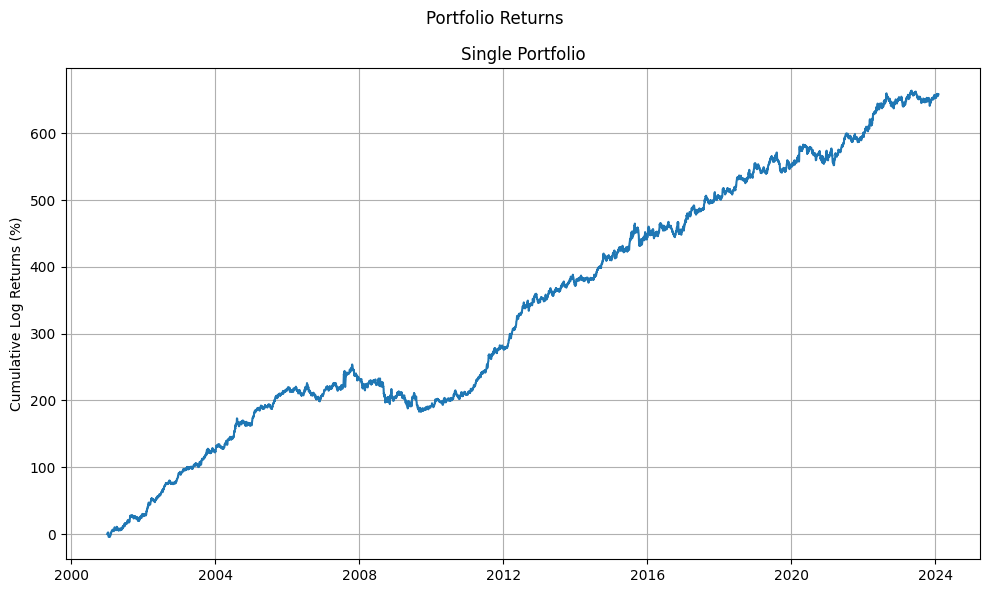

In [10]:
sfp.generate_returns_chart(
    returns,
    title="Portfolio Returns",
    subtitle="Single Portfolio",
    log_scale=True
)

### 1.7 Multi-Returns Chart

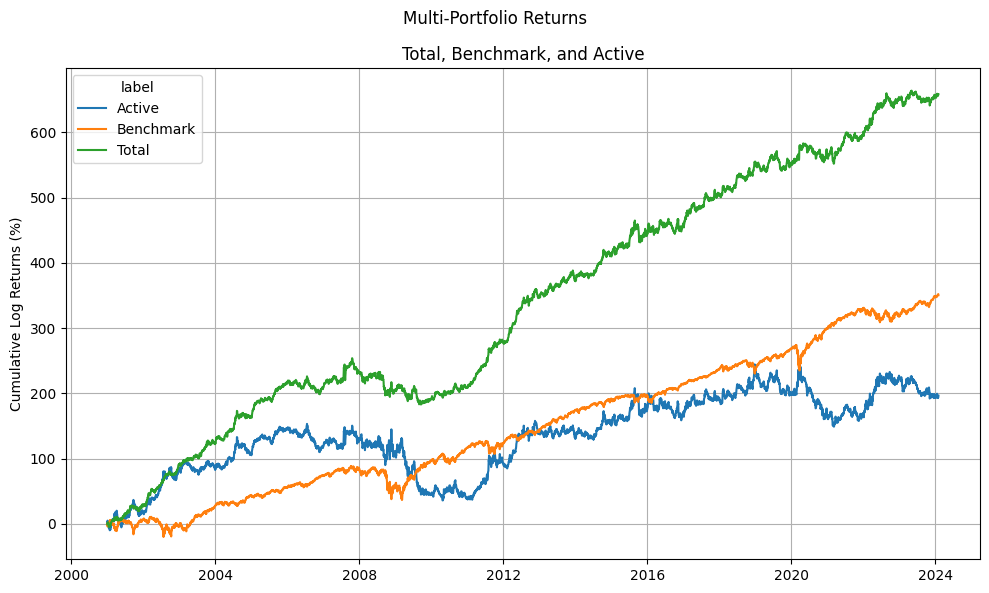

In [11]:
sfp.generate_multi_returns_chart(
    multi_returns,
    title="Multi-Portfolio Returns",
    subtitle="Total, Benchmark, and Active",
    log_scale=True
)

---
## 2. Leverage

Test portfolio leverage generation, summary statistics, and visualization.

### 2.1 Generate Leverage

In [12]:
leverage = sfp.generate_leverage_from_weights(weights)
leverage.head()

date,leverage
date,f64
2000-12-29,7.44
2001-01-02,7.29
2001-01-03,7.14
2001-01-04,7.29
2001-01-05,7.3


### 2.2 Leverage Summary Table

In [13]:
leverage_summary = sfp.generate_leverage_summary_table(leverage)
leverage_summary

Count,Mean Leverage,Min Leverage,Max Leverage,Std Leverage
u32,f64,f64,f64,f64
5807,15.84,6.82,22.62,3.68


### 2.3 Leverage Chart

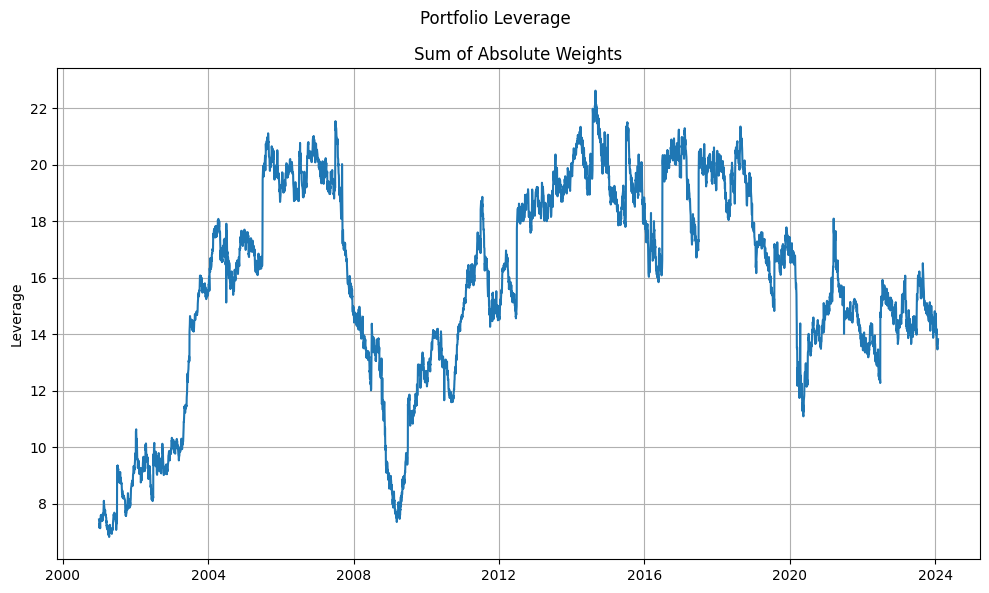

Chart saved to: test_leverage_chart.png


In [ ]:
sfp.generate_leverage_chart(
    leverage,
    title="Portfolio Leverage",
    subtitle="Sum of Absolute Weights"
)

---
## 3. Drawdowns

Test portfolio drawdown generation, summary statistics, and visualization.

### 3.1 Generate Drawdown

In [15]:
drawdown = sfp.generate_drawdown_from_returns(returns)
drawdown.head()

date,drawdown
date,f64
2000-12-29,0.0
2001-01-02,0.0
2001-01-03,0.0
2001-01-04,-0.002672
2001-01-05,-0.008998


### 3.2 Drawdown Summary Table

In [16]:
drawdown_summary = sfp.generate_drawdown_summary_table(drawdown)
drawdown_summary

Count,Mean Drawdown (%),Max Drawdown (%),Current Drawdown (%),Longest Drawdown (days)
u32,f64,f64,f64,i32
5807,-10.53,-50.87,-5.45,941


### 3.3 Drawdown Chart

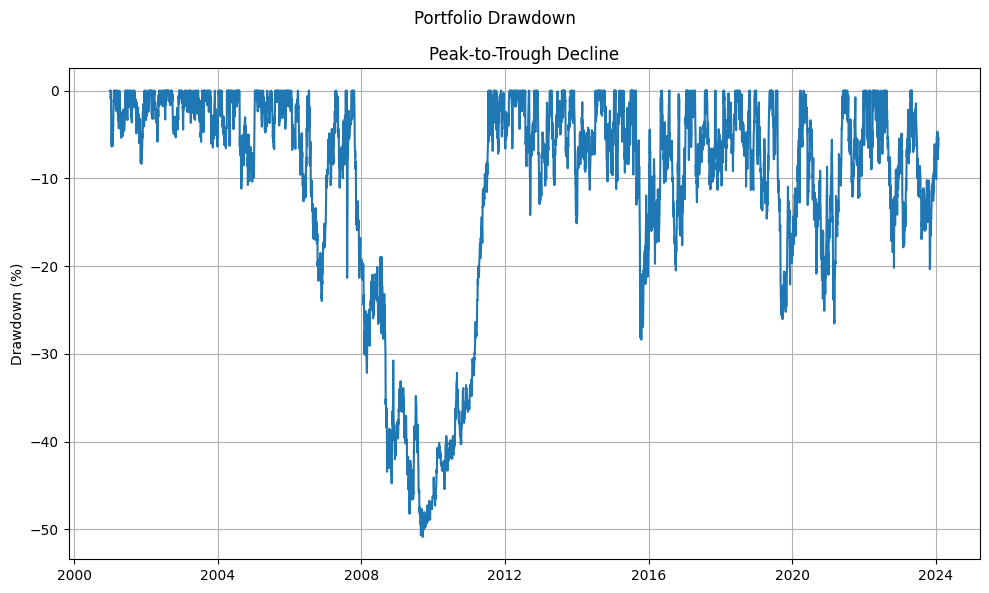

In [18]:
sfp.generate_drawdown_chart(
    drawdown,
    title="Portfolio Drawdown",
    subtitle="Peak-to-Trough Decline"
)

---
## 4. Information Coefficients

Test information coefficient generation and visualization.

In [ ]:
# ics = sfp.generate_alpha_ics(alphas, rets)
# ics.head()

In [ ]:
# sfp.generate_ic_chart(ics)